This archive is used to test the model and it is a base line for the archive used in the Unity application.

In [ ]:
import pickle
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.morphology as morph
from skimage.transform import resize
from matplotlib.colors import rgb_to_hsv
from skimage.feature import local_binary_pattern, hog

In [ ]:
filename = 'Scissor10.jpg'
img = imageio.imread("fotos/" + filename)

In [ ]:
def median_filter(img, filterSize=3):
  filterRadius = filterSize//2
  img_pad = np.pad(img, ((filterRadius, ),(filterRadius, )), 'edge')

  filtered_img = np.zeros(img_pad.shape)
  for x in np.arange(filterRadius, img_pad.shape[0]-filterRadius+1):
    for y in np.arange(filterRadius, img_pad.shape[1]-filterRadius+1):
      med_region = np.median(img_pad[x-filterRadius:x+filterRadius+1, y-filterRadius:y+filterRadius+1])
      filtered_img[x,y] = med_region

  return filtered_img[filterRadius:img_pad.shape[0]-filterRadius, filterRadius:img_pad.shape[1]-filterRadius]

In [ ]:
def normalize(img):
    img_new = (((img - np.amin(img))*255)/(np.amax(img) - np.amin(img))).astype(np.uint8)
    return img_new

In [ ]:
def preprocessing(img):
  aux = resize(img, (150, 150, 3), anti_aliasing=False)
  aux = rgb_to_hsv(aux)
  aux = normalize(aux[:,:,2])
  aux = median_filter(aux)
  aux = aux - morph.erosion(aux, morph.disk(2))

  return aux

(-0.5, 149.5, 149.5, -0.5)

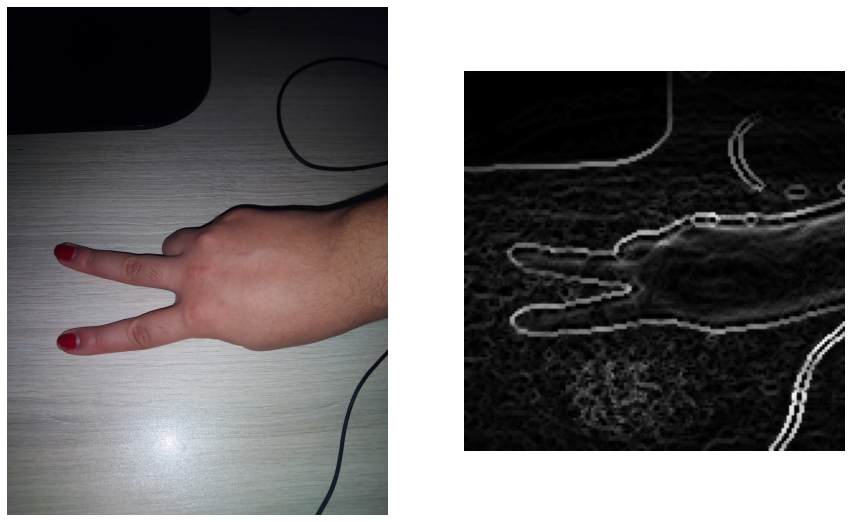

In [ ]:
#Preprocessing the image to extract features
img_processed = preprocessing(img)

plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(img); plt.axis('off')
plt.subplot(122); plt.imshow(img_processed, cmap='gray'); plt.axis('off')

In [ ]:
aux = local_binary_pattern(img_processed, 8, 1)
hist, bins = np.histogram(aux, int(aux.max() + 1), density=True)

hog_v = hog(img_processed, feature_vector=True)
features = np.append(hist,hog_v)

In [ ]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
y = loaded_model.predict(features.reshape(1, -1))
print(y)

[2]
